<a href="https://colab.research.google.com/github/VaideswarReddy/Mobile_price_prediction/blob/main/Mobile_price_prediction_Vaideswar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #The libraries & modules which we are going to use in our study:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/ML Projects/Mobile price prediction/data_mobile_price_range.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


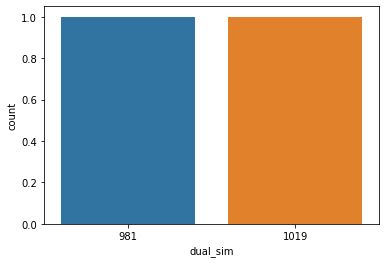

In [ ]:
sns.countplot(df.dual_sim.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


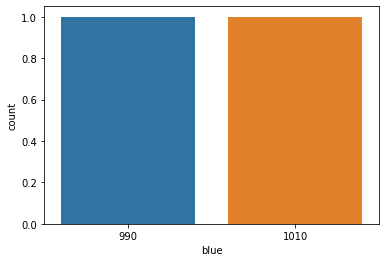

In [ ]:
sns.countplot(df.blue.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


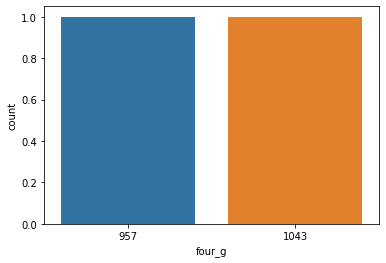

In [ ]:
sns.countplot(df.four_g.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


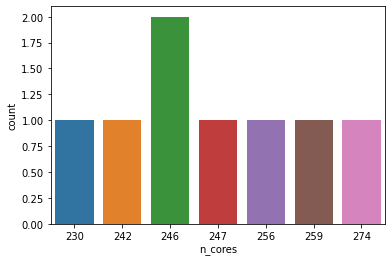

In [ ]:
sns.countplot(df.n_cores.value_counts())

In [ ]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


{'boxes': [<matplotlib.patches.PathPatch at 0x7f12290fc190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1229101790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f12291097d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1229109250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f12290fcc90>,
  <matplotlib.lines.Line2D at 0x7f1229101250>]}

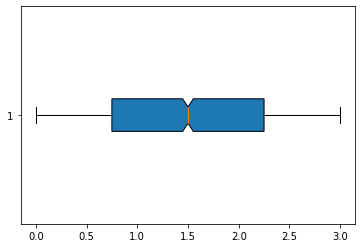

In [ ]:
plt.boxplot(df['price_range'], patch_artist = True,
                notch ='True', vert = 0)

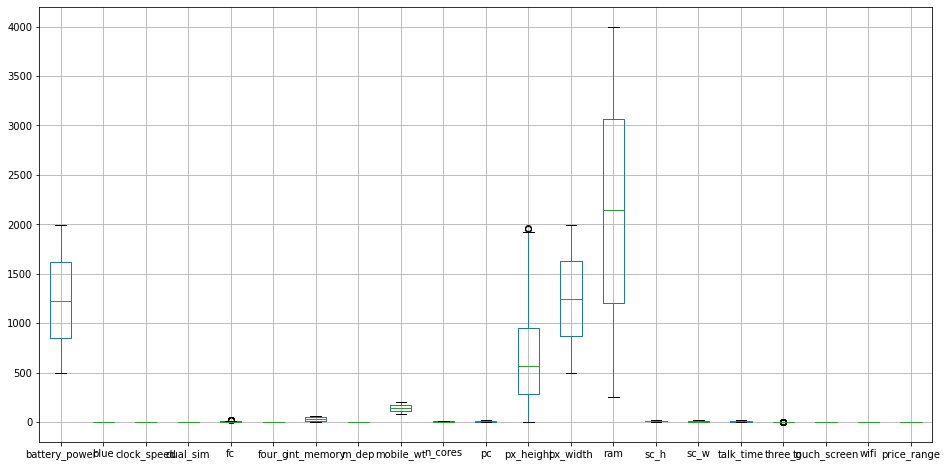

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 8))
df.boxplot(column=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'])

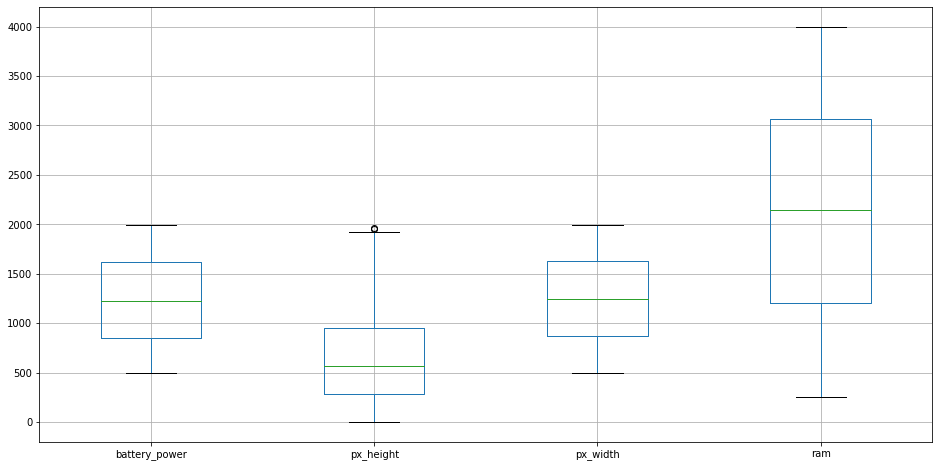

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 8))
df.boxplot(column=['battery_power', 'px_height', 'px_width','ram'])

In [ ]:
df.battery_power.value_counts()

1589    6
618     6
1872    6
1379    5
1310    5
       ..
1072    1
1073    1
1074    1
1075    1
1998    1
Name: battery_power, Length: 1094, dtype: int64

In [ ]:
df.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [3]:
df['screen_pixels'] = df['px_height'] * df['px_width']
df = df.drop(columns=['px_height','px_width'])

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7,19,0,0,1,1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,17,3,7,1,1,0,2,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,11,2,9,1,1,0,2,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,16,8,11,1,0,0,2,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,8,2,15,1,1,0,1,1464096


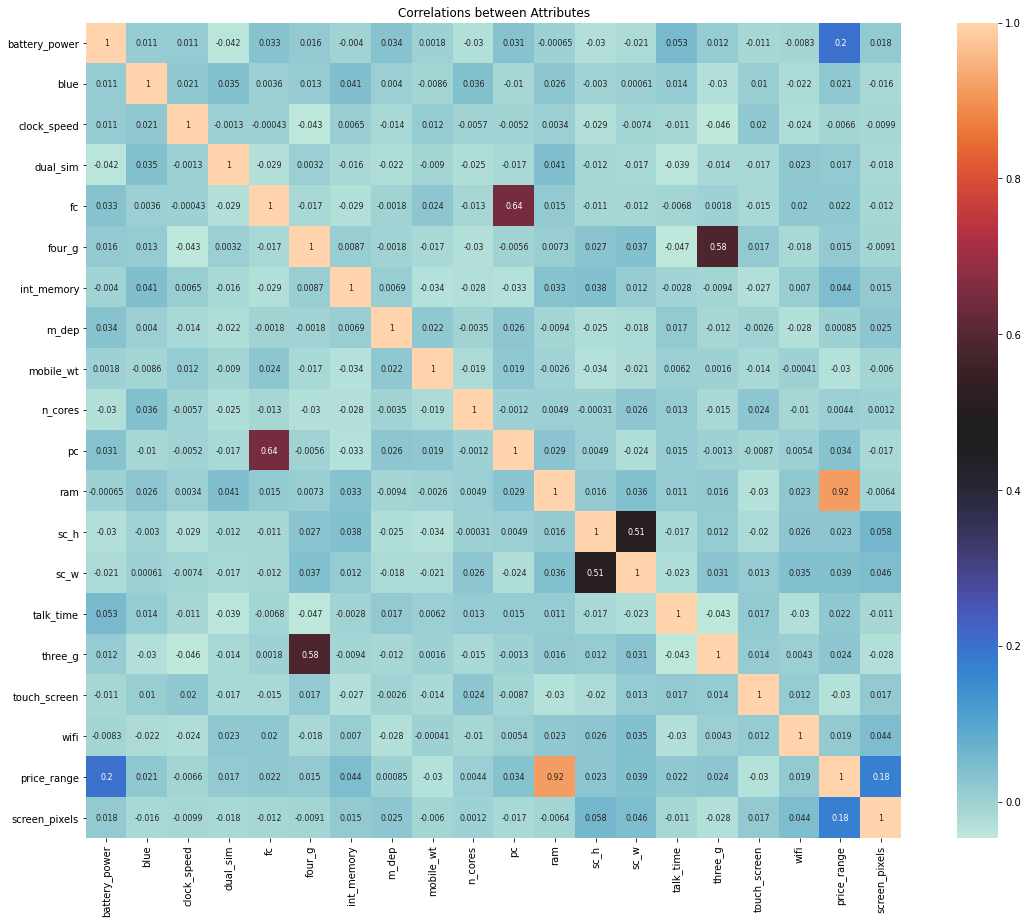

In [ ]:
fig = plt.subplots (figsize = (20, 15))
sns.heatmap(df.corr (), square = True, annot = True,cmap='icefire' ,annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


##Binning by mean

In [ ]:
df_b = df.copy()

In [ ]:
df_b.sort_values('ram',inplace=True)

In [ ]:
df_b.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_pixels
1745,926,1,0.8,0,6,1,59,0.8,161,7,14,256,18,7,2,1,0,1,0,66612
1389,1801,0,0.5,1,6,0,52,0.9,120,6,10,258,14,8,9,1,0,0,0,170800
467,1433,0,1.6,0,7,0,4,0.7,133,8,11,258,11,9,4,1,1,1,0,224519
1230,697,0,2.7,1,5,1,20,0.4,173,2,6,259,12,6,4,1,1,1,0,706006
1224,1515,0,2.6,0,0,1,56,0.9,184,3,1,262,14,4,20,1,1,0,0,2290734


In [ ]:
def binning_function(column,cutpoints,labels=None):
  minval = column.min()
  maxval = column.max()
  break_points = [minval] + cutpoints + [maxval]
  print(break_points)
  if not labels:
    labels = range(len(cutpoints)+1)
  colbins = pd.cut(column,bins=break_points,labels=labels,include_lowest=True)
  return colbins

In [ ]:
binning_function(df_b.ram,[500,1000,1500,2000,2500,3000,3500])

[256, 500, 1000, 1500, 2000, 2500, 3000, 3500, 3998]


1745    0
1389    0
467     0
1230    0
1224    0
       ..
1684    7
799     7
69      7
1816    7
940     7
Name: ram, Length: 2000, dtype: category
Categories (8, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6 < 7]

In [ ]:
df_b['ram_bin'] = binning_function(df_b.ram,[500,1000,1500,2000,2500,3000,3500])

[256, 500, 1000, 1500, 2000, 2500, 3000, 3500, 3998]


In [ ]:
lt_0 = []
lt_1 = []
lt_2 = []
lt_3 = []
lt_4 = []
lt_5 = []
lt_6 = []
lt_7 = []
for i in range(len(df_b['ram_bin'])):
  if df_b['ram_bin'][i] == 0:
    lt_0.append(df_b['ram'][i])
  elif df_b['ram_bin'][i] == 1:
    lt_1.append(df_b['ram'][i])
  elif df_b['ram_bin'][i] == 2:
    lt_2.append(df_b['ram'][i])
  elif df_b['ram_bin'][i] == 3:
    lt_3.append(df_b['ram'][i])
  elif df_b['ram_bin'][i] == 4:
    lt_4.append(df_b['ram'][i])
  elif df_b['ram_bin'][i] == 5:
    lt_5.append(df_b['ram'][i])
  elif df_b['ram_bin'][i] == 6:
    lt_6.append(df_b['ram'][i])
  else:
    lt_7.append(df_b['ram'][i])

In [ ]:
bin1_mean = (sum(lt_0))/len(lt_0)
bin2_mean = (sum(lt_1))/len(lt_1)
bin3_mean = (sum(lt_2))/len(lt_2)
bin4_mean = (sum(lt_3))/len(lt_3)
bin5_mean = (sum(lt_4))/len(lt_4)
bin6_mean = (sum(lt_5))/len(lt_5)
bin7_mean = (sum(lt_6))/len(lt_6)
bin8_mean = (sum(lt_7))/len(lt_7)

In [ ]:
df_b['bin_means'] = np.zeros(2000)

In [ ]:
df_b["bin_means"].replace({0 : bin1_mean, 1: bin2_mean, 2: bin3_mean, 3: bin4_mean,4 : bin5_mean, 5: bin6_mean, 6: bin7_mean, 7: bin8_mean}, inplace=True)

In [ ]:
df_b.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_pixels,ram_bin,bin_means
1745,926,1,0.8,0,6,1,59,0.8,161,7,14,256,18,7,2,1,0,1,0,66612,0,378.924242
1389,1801,0,0.5,1,6,0,52,0.9,120,6,10,258,14,8,9,1,0,0,0,170800,0,378.924242
467,1433,0,1.6,0,7,0,4,0.7,133,8,11,258,11,9,4,1,1,1,0,224519,0,378.924242
1230,697,0,2.7,1,5,1,20,0.4,173,2,6,259,12,6,4,1,1,1,0,706006,0,378.924242
1224,1515,0,2.6,0,0,1,56,0.9,184,3,1,262,14,4,20,1,1,0,0,2290734,0,378.924242


In [ ]:
len(lt_0)

398

In [ ]:
len(lt_1)

522

In [ ]:
len(lt_2)

556

In [ ]:
len(lt_3)

524

In [ ]:
df_b.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_pixels,ram_bin,bin_means
1745,926,1,0.8,0,6,1,59,0.8,161,7,14,256,18,7,2,1,0,1,0,66612,0,378.924242
1389,1801,0,0.5,1,6,0,52,0.9,120,6,10,258,14,8,9,1,0,0,0,170800,0,378.924242
467,1433,0,1.6,0,7,0,4,0.7,133,8,11,258,11,9,4,1,1,1,0,224519,0,378.924242
1230,697,0,2.7,1,5,1,20,0.4,173,2,6,259,12,6,4,1,1,1,0,706006,0,378.924242
1224,1515,0,2.6,0,0,1,56,0.9,184,3,1,262,14,4,20,1,1,0,0,2290734,0,378.924242


In [ ]:
df_b.drop(columns='ram',inplace=True)

In [ ]:
df_b.drop(columns='ram_bin',inplace=True)

In [ ]:
df_b.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_pixels,bin_means
1745,926,1,0.8,0,6,1,59,0.8,161,7,14,18,7,2,1,0,1,0,66612,378.924242
1389,1801,0,0.5,1,6,0,52,0.9,120,6,10,14,8,9,1,0,0,0,170800,378.924242
467,1433,0,1.6,0,7,0,4,0.7,133,8,11,11,9,4,1,1,1,0,224519,378.924242
1230,697,0,2.7,1,5,1,20,0.4,173,2,6,12,6,4,1,1,1,0,706006,378.924242
1224,1515,0,2.6,0,0,1,56,0.9,184,3,1,14,4,20,1,1,0,0,2290734,378.924242


# Logistic Regression

In [ ]:
df_l = df_b.copy()

In [ ]:
X = df_l.drop(['price_range'],axis=1)
y = df_l['price_range']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
acc_lr

0.285

In [ ]:
# Get the predicted classes
train_class_preds = lr.predict(X_train)
test_class_preds = lr.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.27125
The accuracy on test data is  0.285


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
confusion_matrix

array([[30,  0,  0, 70],
       [24,  0,  0, 76],
       [20,  0,  0, 80],
       [16,  0,  0, 84]])

# Decesion Tree

In [ ]:
df_d = df.copy()

In [ ]:
df_d.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
X = df_d.drop(['price_range'],axis=1)
y = df_d['price_range']

In [ ]:
dt = DecisionTreeClassifier(max_depth= 10,min_samples_split=5,random_state=101)
dt_model = dt.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_dt))

[[27 20 37 16]
 [26 25 22 27]
 [30 19 23 28]
 [19 26 28 27]]


In [ ]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.26      0.27      0.27       100
           1       0.28      0.25      0.26       100
           2       0.21      0.23      0.22       100
           3       0.28      0.27      0.27       100

    accuracy                           0.26       400
   macro avg       0.26      0.26      0.26       400
weighted avg       0.26      0.26      0.26       400



In [ ]:
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)
acc_dt

0.255

In [ ]:
# Get the predicted classes
train_class_preds_d = dt.predict(X_train)
test_class_preds_d = dt.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_d = accuracy_score(train_class_preds_d,y_train)
test_accuracy_d = accuracy_score(test_class_preds_d,y_test)

print("The accuracy on train data is ", train_accuracy_d)
print("The accuracy on test data is ", test_accuracy_d)

The accuracy on train data is  0.688125
The accuracy on test data is  0.255


# Without Binning technique

In [ ]:
df_d = df.copy()

In [ ]:
df_d.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_pixels
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7,19,0,0,1,1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,17,3,7,1,1,0,2,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,11,2,9,1,1,0,2,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,16,8,11,1,0,0,2,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,8,2,15,1,1,0,1,1464096


In [ ]:
X = df_d.drop(['price_range'],axis=1)
y = df_d['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [ ]:
dt = DecisionTreeClassifier(max_depth= 10,min_samples_split=5,random_state=101)
dt_model = dt.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_dt))

[[95  5  0  0]
 [ 6 79 15  0]
 [ 0 13 80  7]
 [ 0  0 11 89]]


In [ ]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.81      0.79      0.80       100
           2       0.75      0.80      0.78       100
           3       0.93      0.89      0.91       100

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [ ]:
# Get the predicted classes
train_class_preds_d = dt.predict(X_train)
test_class_preds_d = dt.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_d = accuracy_score(train_class_preds_d,y_train)
test_accuracy_d = accuracy_score(test_class_preds_d,y_test)

print("The accuracy on train data is ", train_accuracy_d)
print("The accuracy on test data is ", test_accuracy_d)

The accuracy on train data is  0.985
The accuracy on test data is  0.8575


# Random Forest

In [33]:
df_r = df.copy()

In [34]:
X = df_r.drop(['price_range'],axis=1)
y = df_r['price_range']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [36]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_r = clf.predict(X_test)


# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_r))



ACCURACY OF THE MODEL:  0.88


In [10]:
clf.feature_importances_

array([0.07662991, 0.00680007, 0.03096559, 0.00747392, 0.0268805 ,
       0.00702472, 0.04078779, 0.02923108, 0.04515083, 0.02513793,
       0.03383802, 0.47969311, 0.03061279, 0.03218342, 0.03347342,
       0.00631829, 0.00787108, 0.00698133, 0.0729462 ])

In [37]:
print(metrics.classification_report(y_test, y_pred_r))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       100
           1       0.85      0.80      0.82       100
           2       0.82      0.81      0.81       100
           3       0.92      0.94      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



# KNN

In [24]:
df_k = df.copy()

In [25]:
X = df_k.drop(['price_range'],axis=1)
y = df_k['price_range']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
y_pred_k = knn.predict(X_test)



In [30]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_k))

ACCURACY OF THE MODEL:  0.3325


In [31]:
print(metrics.classification_report(y_test, y_pred_k))

              precision    recall  f1-score   support

           0       0.42      0.50      0.46       100
           1       0.26      0.31      0.28       100
           2       0.31      0.33      0.32       100
           3       0.32      0.19      0.24       100

    accuracy                           0.33       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.33      0.33      0.33       400

